In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [50]:
df0 = pd.read_csv("/Users/isaiahpinto/PycharmProjects/Personal-Projects/Housing/Housing.csv")

In [51]:
df0.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [52]:
df=df0.copy()

In [53]:
df.shape

(545, 13)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [55]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [56]:
df.duplicated().sum()

0

In [57]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [58]:
df.describe(include='O')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [60]:
def extract_cols(x):
    global numerical_var,categorical_var
    numerical_var = list(x.describe().columns)
    categorical_var = list(x.describe(include='O').columns)
    return

In [61]:
extract_cols(df)

In [62]:
numerical_var

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [63]:
def numerical_univariate_analysis(x,col):
    fig, axs= plt.subplots(1,2,figsize=(10,5))
    fig.tight_layout()
    
    sns.histplot(x=x[col],bins=30,kde=True,ax=axs[0])
    axs[0].set_title(f'Histogram for {proper(col)} distribution')
    
    sns.boxplot(x=x[col],ax=axs[1])
    axs[1].set_title(f'Boxplot for {proper(col)}')
    plt.show()
    

In [64]:
def proper(x):
    return x.title()

In [65]:
numerical_var

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

1. Univariate Analysis for Price


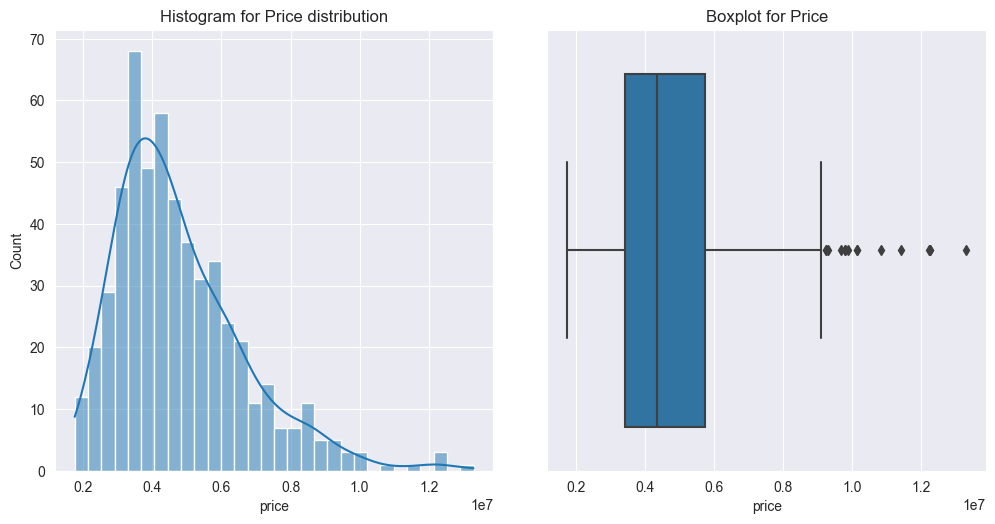

2. Univariate Analysis for Area


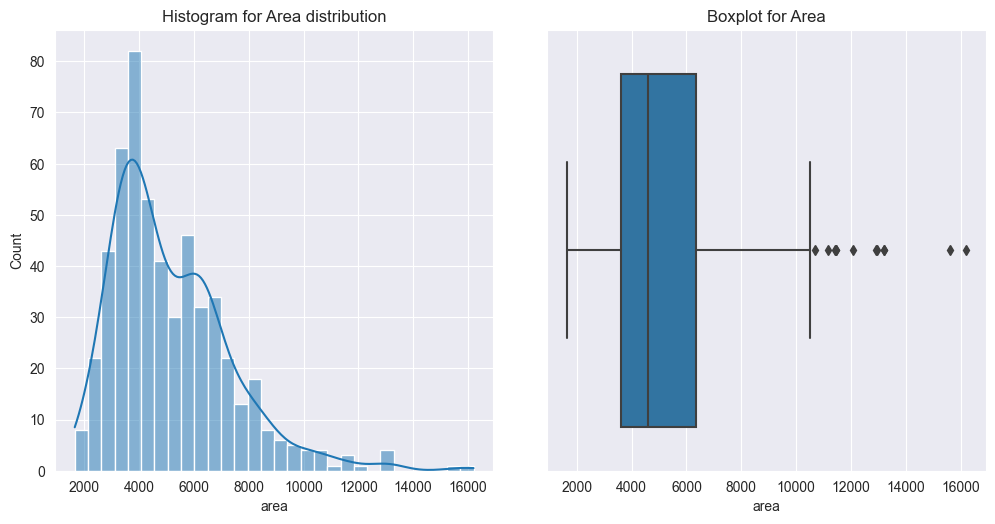

3. Univariate Analysis for Bedrooms


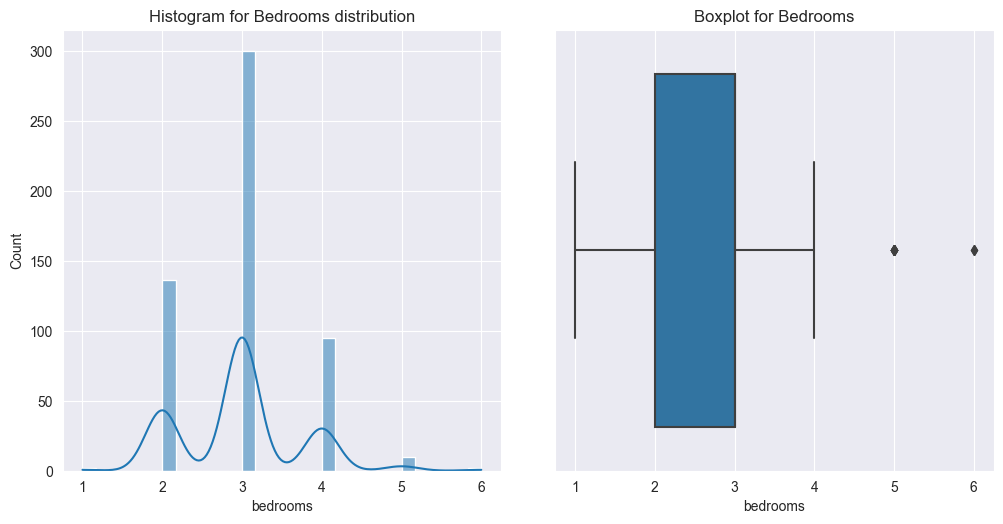

4. Univariate Analysis for Bathrooms


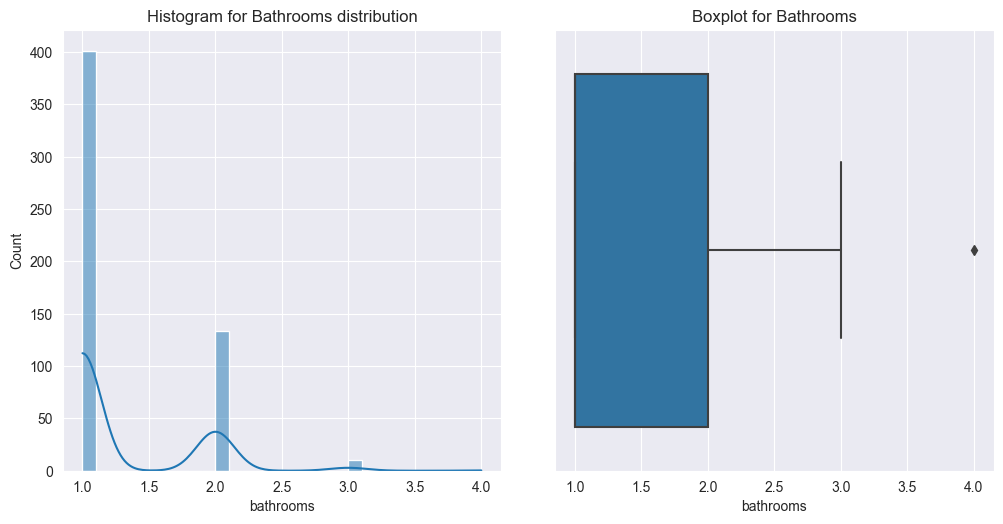

5. Univariate Analysis for Stories


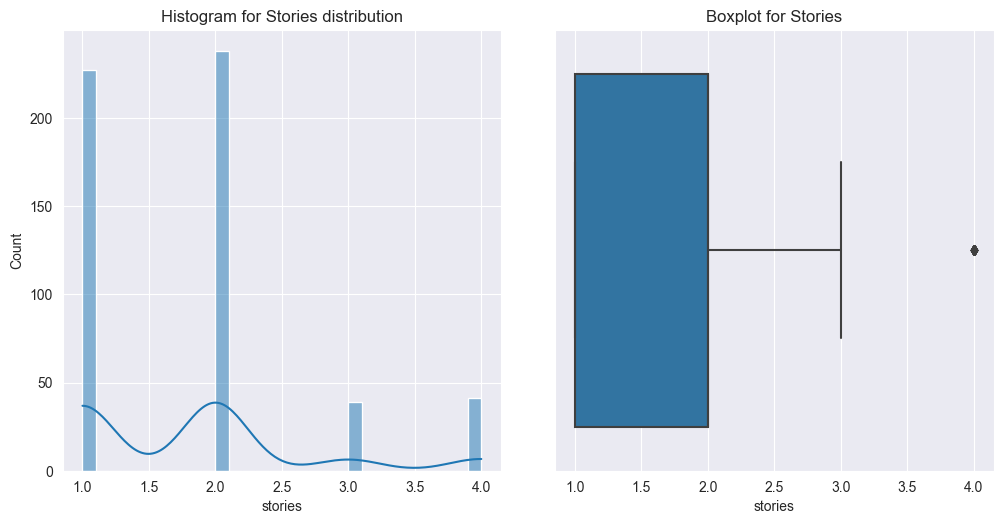

6. Univariate Analysis for Parking


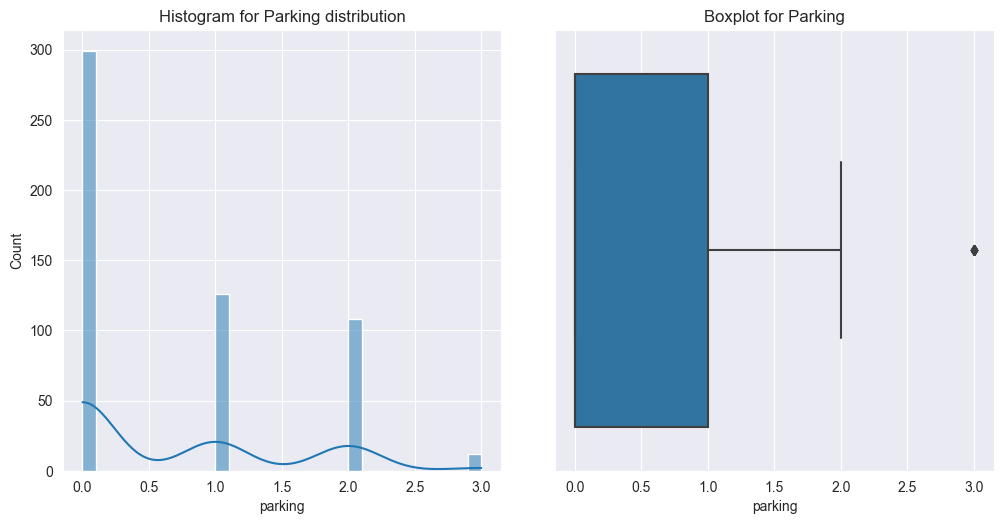

In [66]:
a = 1
for col in numerical_var:
    print(f'{a}. Univariate Analysis for {proper(col)}')
    numerical_univariate_analysis(df,col)
    print("==="*30)
    a+=1

In [67]:
df['price'] = np.log(df['price'])
df['area'] = np.log(df['area'])

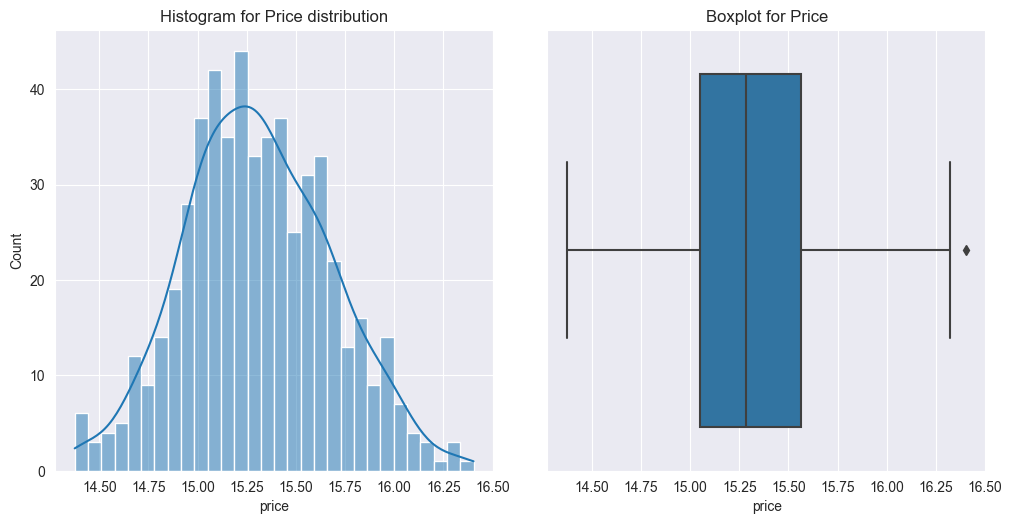

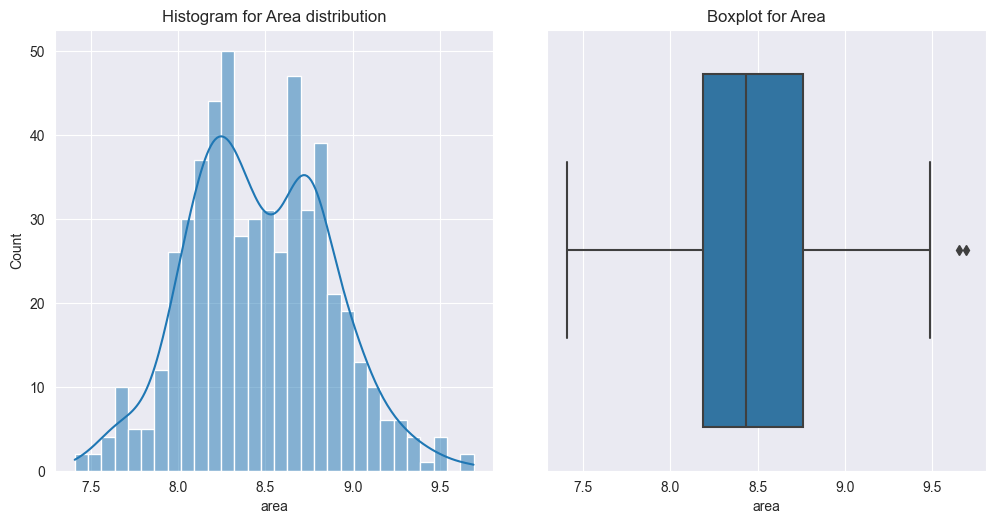

In [68]:
for col in numerical_var[:2]:
    numerical_univariate_analysis(df,col)

In [69]:
def bivariate_analysis(x,col):
    fig, axs= plt.subplots(1,2,figsize=(10,5))
    fig.tight_layout()
    
    sns.scatterplot(x=x[col],y=x['price'],ax=axs[0])
    axs[0].set_title(f'Scatterplot for {proper(col)} vs Price')
    
    sns.heatmap(data = df[[col,'price']].corr(),annot=True)
    axs[1].set_title(f'Heatmap for {proper(col)} vs Price')
    plt.show()
    

1. Bivariate Analysis of Price and Price 


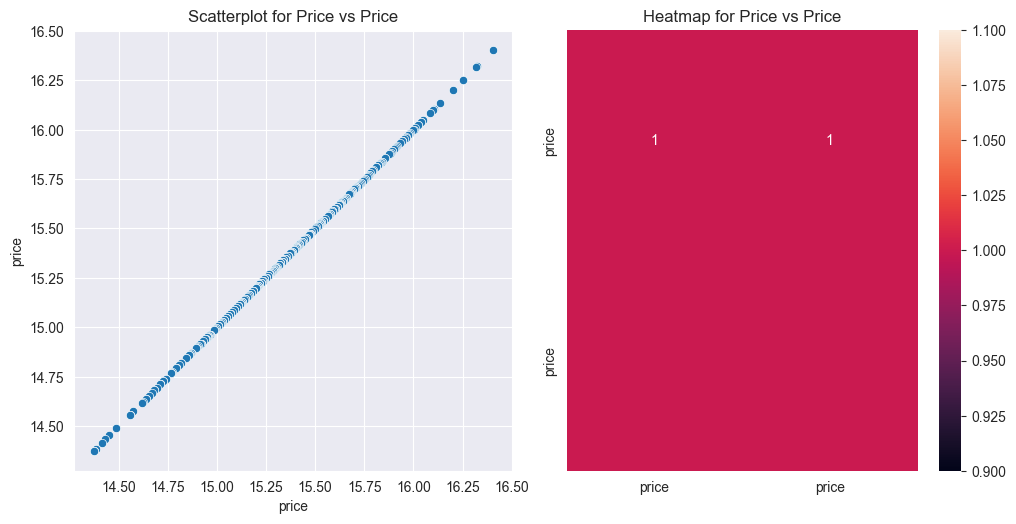

2. Bivariate Analysis of Area and Price 


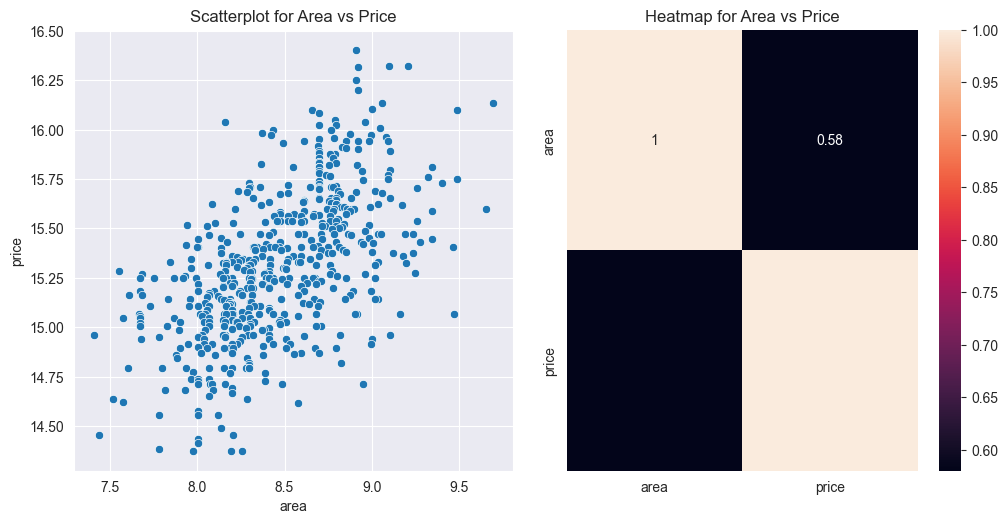

3. Bivariate Analysis of Bedrooms and Price 


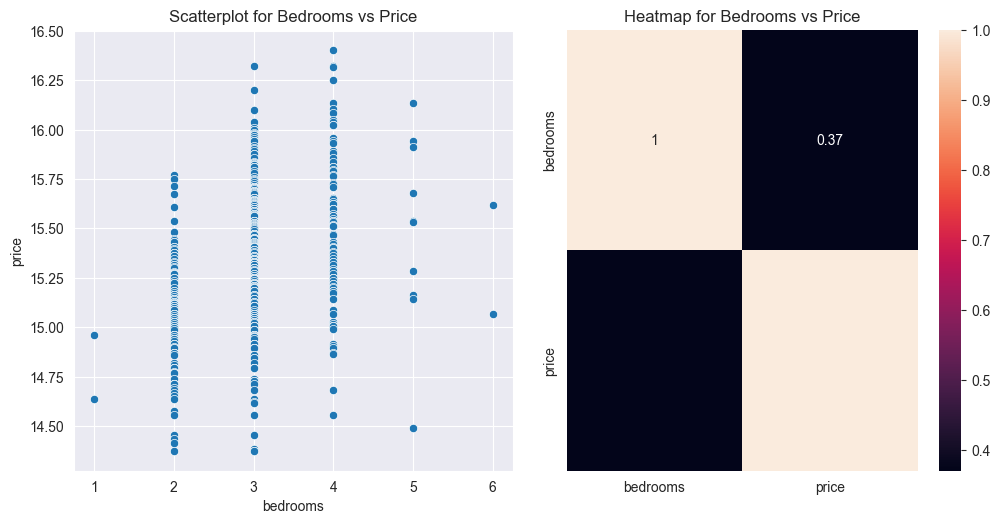

4. Bivariate Analysis of Bathrooms and Price 


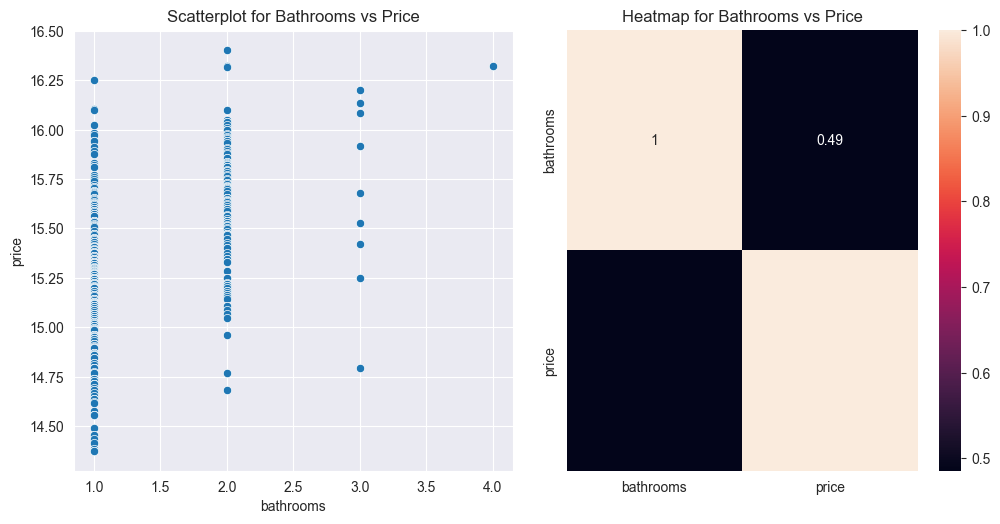

5. Bivariate Analysis of Stories and Price 


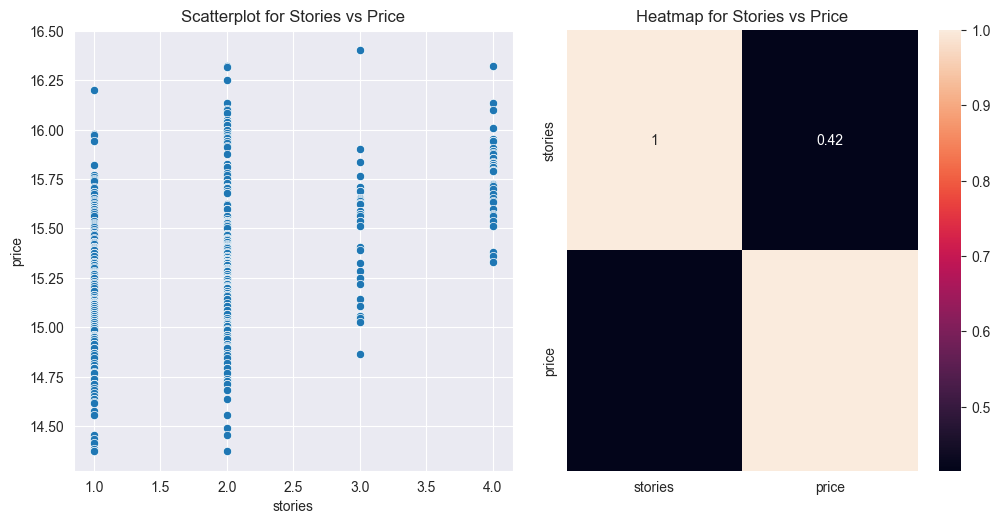

6. Bivariate Analysis of Parking and Price 


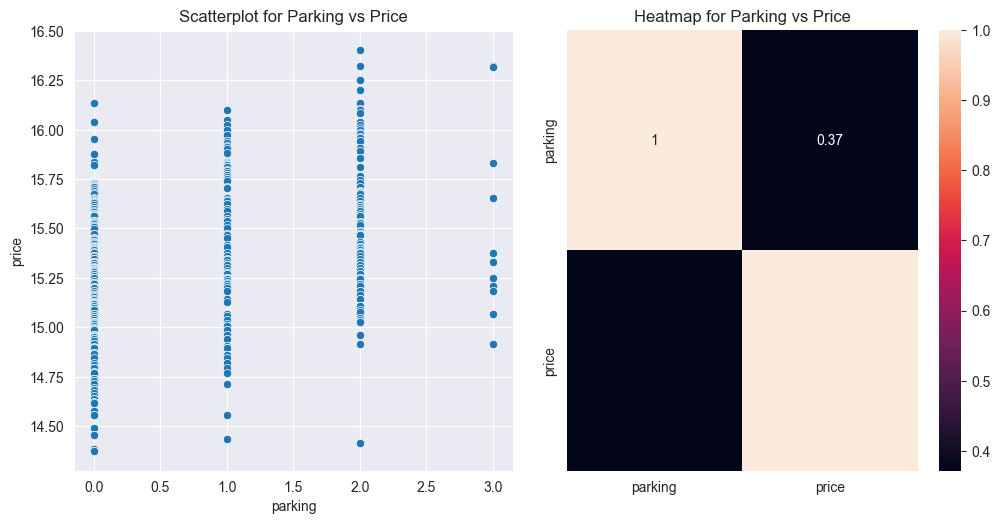

In [70]:
a=1
for col in numerical_var:
    print(f'{a}. Bivariate Analysis of {proper(col)} and Price ')
    bivariate_analysis(df,col)
    print("==="*30)
    a+=1

In [71]:
def categorical_bivariate_analysis(x,col):
    fig,axs = plt.subplots(1,1,figsize=(10,3))
    
    sns.boxplot(data=x,y=x[col],x=x['price'],ax=axs)
    axs.set_title(f'Boxplot Analysis of {proper(col)} vs Price')
    plt.show()

1. Bivariate Analysis of Mainroad and Price


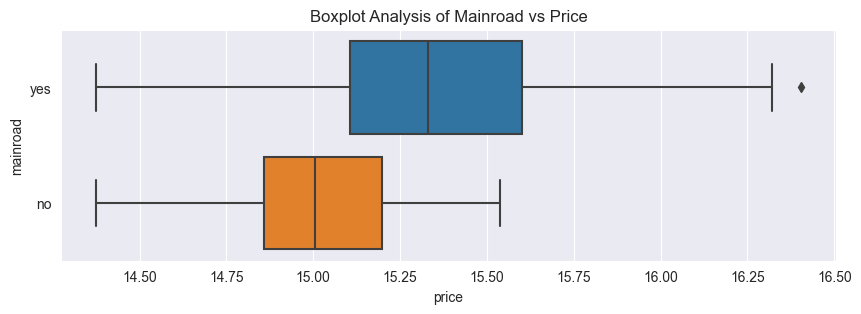

2. Bivariate Analysis of Guestroom and Price


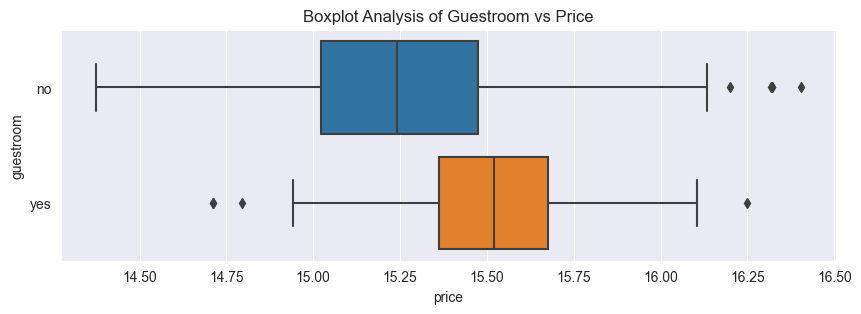

3. Bivariate Analysis of Basement and Price


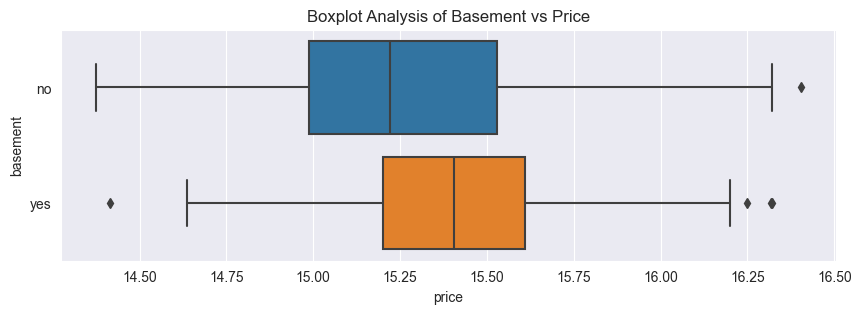

4. Bivariate Analysis of Hotwaterheating and Price


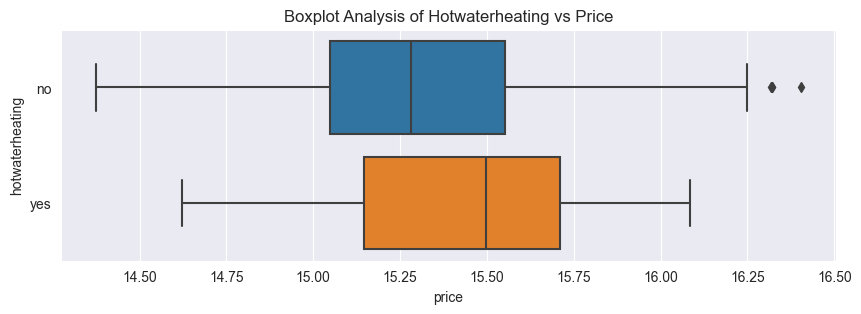

5. Bivariate Analysis of Airconditioning and Price


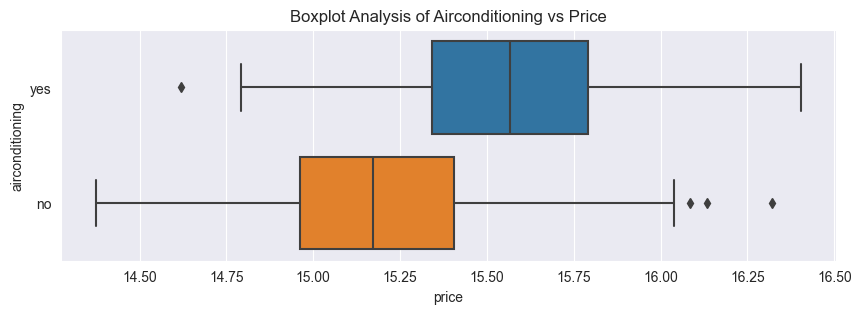

6. Bivariate Analysis of Prefarea and Price


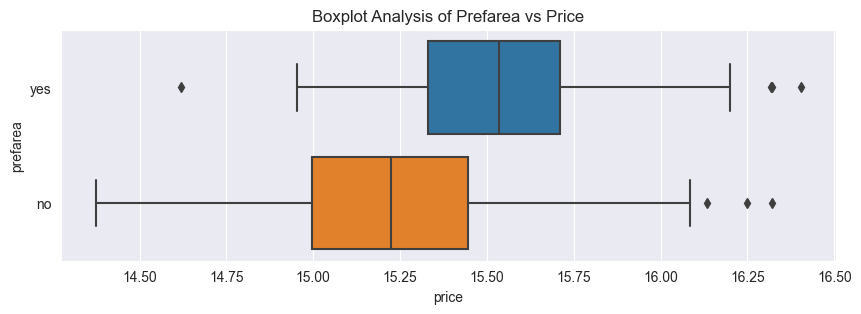

7. Bivariate Analysis of Furnishingstatus and Price


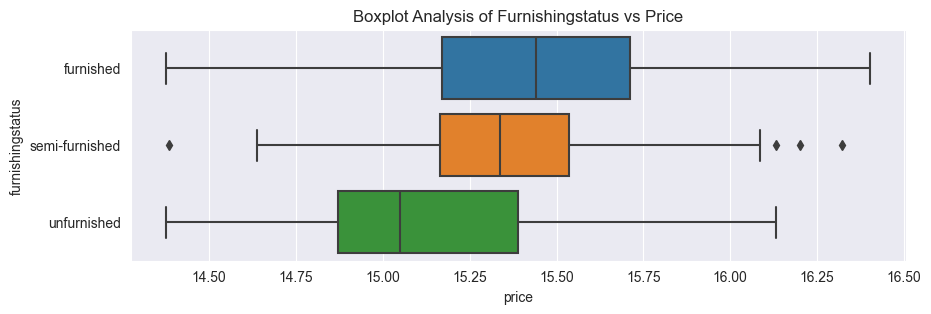

In [72]:
a=1
for col in categorical_var:
    print(f'{a}. Bivariate Analysis of {proper(col)} and Price')
    categorical_bivariate_analysis(df,col)
    print("==="*30)
    a+=1

In [73]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,8.911934,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,16.321036,9.100526,4,4,4,yes,no,no,no,yes,3,no,furnished
2,16.321036,9.206332,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,16.318175,8.922658,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,16.250001,8.911934,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,14.414347,8.006368,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,14.384879,7.783224,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,14.375126,8.194229,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,14.375126,7.975908,3,1,1,no,no,no,no,no,0,no,furnished


In [74]:
for col in categorical_var[0:-1]:
    df[col] = df[col].map({'yes':"Yes",'no':"No"})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':"Furnished",'semi-furnished':"Semi-Furnished",'unfurnished':"Unfurnished"})

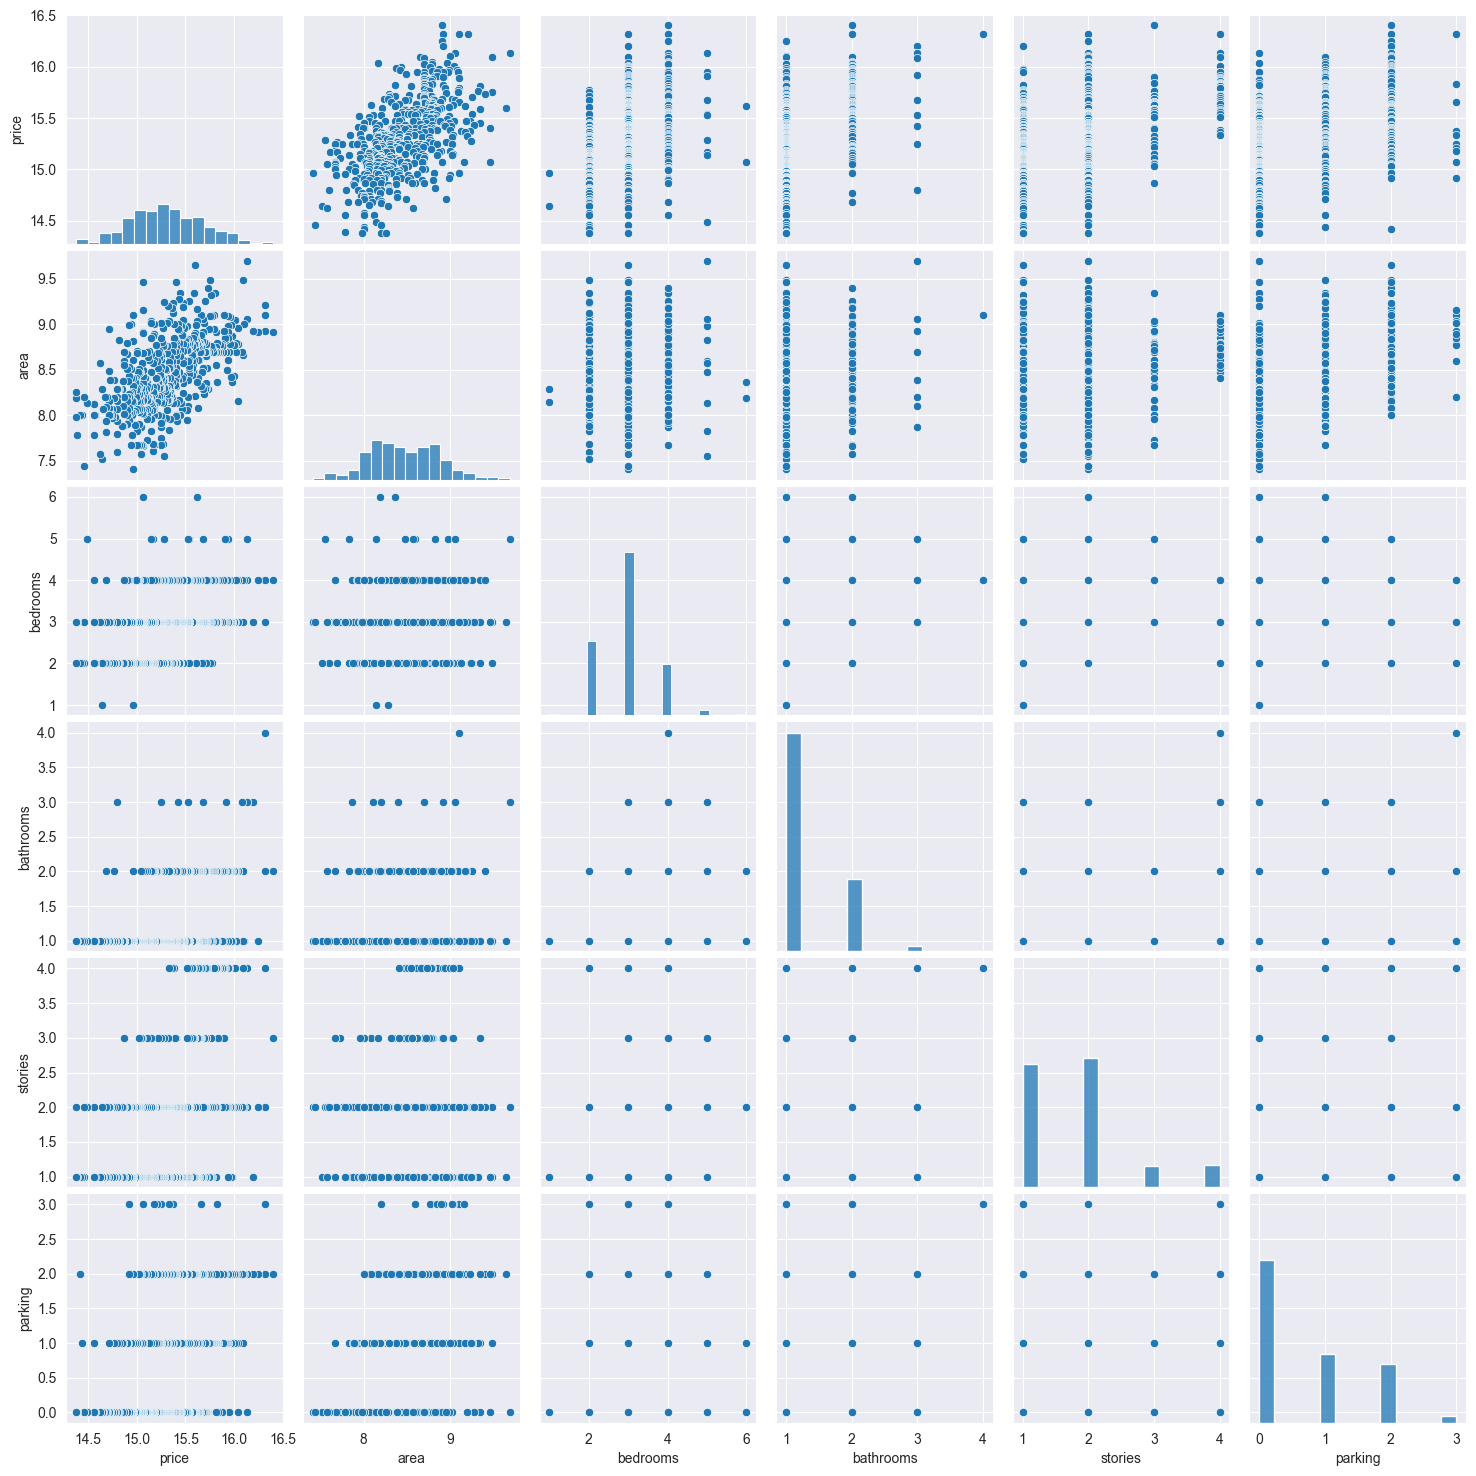

In [75]:
sns.pairplot(data=df)

In [79]:
df = pd.get_dummies(df,drop_first=True)

In [80]:
feature_list = list(df.describe(include="all").columns)

In [81]:
scaler = StandardScaler()
df[feature_list[1:]] = scaler.fit_transform(df[feature_list[1:]])

df_standardmodel = df.copy()

In [82]:
lr = LinearRegression()
svr = SVR()
knn_r = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xgbst = XGBRegressor()

regressors = {"Linear Regressor": lr,
              "Support Vector Regressor": svr,
              "K-Nearest Regressor":knn_r,
              "Decision Tree Regressor":dtr,
              "Random Forest Regressor":rfr,
              "XGBoost Regressor":xgbst}

features = ['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'parking',
 'mainroad_Yes',
 'guestroom_Yes',
 'basement_Yes',
 'hotwaterheating_Yes',
 'airconditioning_Yes',
 'prefarea_Yes',
 'furnishingstatus_Semi-Furnished',
 'furnishingstatus_Unfurnished']

target = 'price'

In [83]:
def train_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    r2score = r2_score(y_test,y_pred)
    return mse,rmse,mae,r2score

In [84]:
ave_mse = []
ave_rmse = []
ave_mae = []
ave_r2 = []

X = df_standardmodel[features]
y = df_standardmodel[target]

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.20)

for name,model in regressors.items():
    
    mse_score,rmse_score,mae_score,r2_scores=train_model(model,X_train,y_train, X_test, y_test)
        
    ave_mse.append(np.mean(mse_score))
    ave_rmse.append(np.mean(rmse_score))
    ave_mae.append(np.mean(mae_score))
    ave_r2.append(np.mean(r2_scores))

results_df = pd.DataFrame({'Model':regressors.keys(),
                            'Type':'Train Test Split',
                            'Mean Squared Error':ave_mse,
                            'Root Mean Squared Error':ave_rmse,
                            'Mean Absolute Error':ave_mae,
                            'R2 Score':ave_r2})

results_df

,Model,Type,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regressor,Train Test Split,0.030944,0.175908,0.135474,0.746503
1,Support Vector Regressor,Train Test Split,0.036947,0.192217,0.147192,0.697318
2,K-Nearest Regressor,Train Test Split,0.047859,0.218766,0.166827,0.607929
3,Decision Tree Regressor,Train Test Split,0.072655,0.269546,0.190819,0.404790
4,Random Forest Regressor,Train Test Split,0.039240,0.198091,0.141522,0.678534
5,XGBoost Regressor,Train Test Split,0.046691,0.216080,0.158577,0.617498


In [90]:
help(LinearRegression())

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 | 

In [91]:
lr.__getstate__()

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
        'mainroad_Yes', 'guestroom_Yes', 'basement_Yes',
        'hotwaterheating_Yes', 'airconditioning_Yes', 'prefarea_Yes',
        'furnishingstatus_Semi-Furnished', 'furnishingstatus_Unfurnished'],
       dtype=object),
 'n_features_in_': 13,
 'coef_': array([ 0.12166149,  0.0259074 ,  0.07337428,  0.07630924,  0.03694392,
         0.02404282,  0.01856484,  0.04845855,  0.0299749 ,  0.0798744 ,
         0.0610061 ,  0.00986877, -0.04973314]),
 'rank_': 13,
 'singular_': array([33.37717938, 25.8817693 , 25.4292112 , 23.58490669, 21.82501225,
        19.46119673, 18.64383958, 17.93873084, 16.95051828, 16.58235008,
        15.52627349, 13.24647768, 12.97294709]),
 'intercept_': 15.305648312750169,
 '_sklearn_version': '1.3.0'}